In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#Declare Base
base = automap_base()

In [6]:
# reflect an existing database into a new model


# reflect the tables
base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

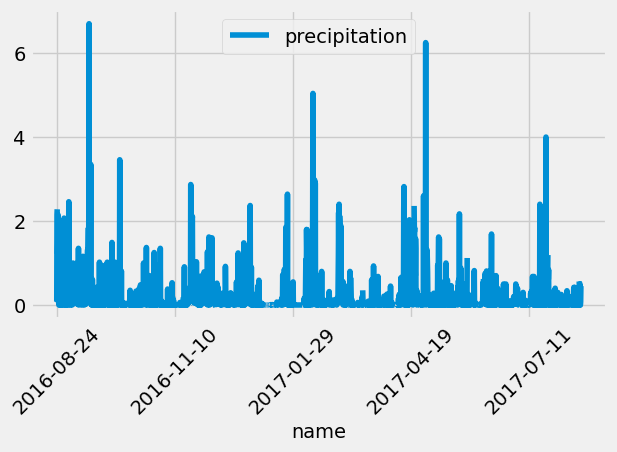

In [32]:
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) -dt.timedelta(days=365)

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
twelve_mo = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > one_year).\
    order_by(measurement.date).all()
    
# Perform a query to retrieve the date and precipitation scores
#date_precip = session.query(measurement.date, measurement.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(twelve_mo, columns=['name', 'precipitation'])

# Sort the dataframe by date
precip_df.sort_values('name')

# Use Pandas Plotting with Matplotlib to plot the data
#precip_df.set_index('precipitation', inplace=True)
precip_df.plot(y='precipitation', x='name', rot=45)
plt.tight_layout()
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station.name).count()
stations

9

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = [func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)]
session.query(*most_active).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

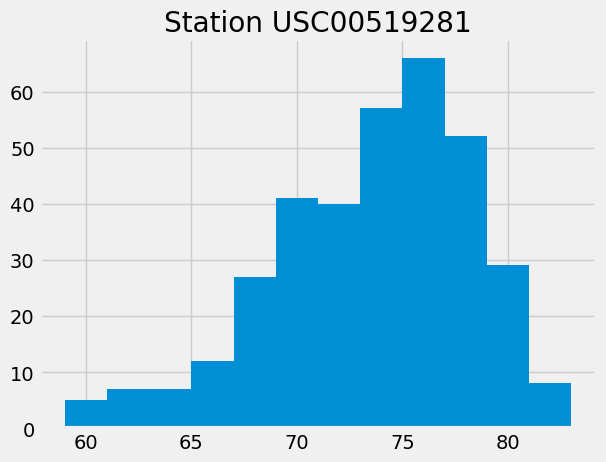

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_year = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
filter(measurement.date > one_year).all()

pd.DataFrame(active_year).hist(bins=12)
plt.title("Station USC00519281")
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()